# Topic Modeling with LDA

In [1]:
pip install pythainlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 29.0 MB/s eta 0:00:00


In [2]:
pip install tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 27.6 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Fou

In [3]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82808 sha256=9f6860af97c52e690eea21436de464a77c9704c02465bdb84e92b49d22c52c37
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55617 sha256=56ae1a0c7a2e1435c68a24de79a48e91e4333d445d625b0caaa4ff5b827d9366
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [5]:
pip install deepcut

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.0 MB/s eta 0:00:00


## Importing libraries and data

In [37]:
import pythainlp
import gensim

import numpy as np
import pandas as pd
import re
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text
import umap.umap_ as umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from pythainlp.corpus.common import thai_words
from pythainlp.util import Trie
import collections
import deepcut

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [38]:
# Wongnai review comment ครกไม้ไทยลาว (Krok Mai Thai Lao) restaurant
data = {'comment':
        ["บ้านพี่เล็ก บ้านพี่เล็กเป็นร้านอาหารแนวครอบครัว เป็นร้านดังย่านลาดกระบังค่ะ วันนั้นแวะไปทานมา สั่งอาหารมา 4 อย่าง มีหมูสับปลาเค็ม คอหมูทอดรากผักชี ซุปเนื้อ และไข่กวนที่ชอบที่สุดใน 4 จานคือคอหมูทอดรากผักชีค่ะ หมูหมักมารสชาติอร่อยนุ่มนวล texture ดี ทานกับข้าวแล้วอร่อยดีมาก รองลงมาคือหมูสับปลาเค็มที่ทานเพลินๆ ดี คนไม่ชอบปลาเค็มทานได้ แต่ถ้าคนชอบปลาเค็มหน่อยจะอยากให้ใส่ปลาเค็มเยอะกว่านี้อีกนิด ซุปเนื้อรสชาติดีมาก แต่เสียดายที่เนื้อไม่เปื่อยแบบเข้าขั้นเหนียวเลย และจานสุดท้ายที่เป็นจานยอดฮิตแต่เราชอบน้อยที่สุดซึ่งก็คือไข่กวนค่ะ คล้ายๆ scrambled eggs ที่ติดคือมันไปไม่หน่อย และมีกลิ่นที่เราไม่ชอบ คล้ายๆ กลิ่นในโรตีVerdict คือถ้าผ่านมาแถวนี้หรือบ้านอยู่แถวนี้เราว่าก็แวะมาได้ อาหาร homey ดีค่ะ",
         "ราคาแพงมาก ไม่สมกับวัตถุดิบที่ได้มาในถ้วย รสชาติอาหารออกแนวโฮมมี่ เหมือนทำทานในครอบครัว พอได้อยู่ค่ะ แต่การบริการไม่ค่อยทั่วถึงเท่าไหร่ พนักงานไม่ค่อยเดินมองลูกค้า มีการเรียกหลายรอบจนต้องโทรเข้าร้านเพื่อแจ้งพนักงานคิดเงิน ร้านมีมุมอับเยอะ ค่อนข้างมืดเพราะไม่เปิดไฟให้ลูกค้า พนักงานอาจจะมองเห็นไม่ทั่วร้าน ส่งนมากจะยืนอยู่แต่เคาน์เตอร์ ใช้บริการค่อนข้างยากค่ะ มองกันไม่ค่อยเห็น",
         "ร้านนี้เป็นร้านอาหารไทยตั้งอยู่ที่บนถนนเฉลิมพระเกียรติร.9 เป็นร้านที่อยู่จากปากซอยไปค่อนข้างลึกแต่เมื่อเข้าไปถึงที่ร้านแล้วต้องตกใจเพราะคนแน่นร้านมาก เพราะ เป็นร้านอาหารไทยที่รสชาติประณีตเหมาะสำหรับมื้อครอบครัวมากวันนี้ที่สั่ง มีเมนูที่หน้าตาคล้ายๆกัน 2 เมนูได้แก่ หมูสับปลาเค็ม และงบห่อใบยอ ความแตกต่างกันก็คืองบ จะมีกลิ่นของสมุนไพรที่ค่อนข้างชัดเจนมีความรู้สึกเหมือนทานอาหารเหนือ ใส่เนื้อสัตว์คือกุ้งและปลาส่วนหมูสับปลาเค็มบีบมะนาวเล็กน้อยจะได้รสเค็มๆหวานๆจากหมูสับ ตักทานกับเครื่องทั้งพริกและหอมแดงซอยโหลดชัดแปลกและดีมากที่นี่เป็นร้านอาหารไทยที่หลายเมนูทานที่อื่นก็จะรสชาติไม่ได้แบบนี้ราคาสูงเล็กน้อยบริการค่อนข้างยุ่งวุ่นวายนิดนึงเพราะว่าคนเยอะ",
         "แวะมาทานช่วงวันหยุดสงกรานต์ จองมาก่อนแต่ไม่ได้สั่งอาหารมา นั่งรออาหารจานแรก 45 นาที และหลังจากนั้น เกือบครึ่งชม. มา 1 จานค่ะ ใช้เวลานั่งรอ3ชม. พนักงานเสริฟผิดโต๊ะบ่อย หลายเมนู หมูสับปลาเค็มเอาไปเสริฟโต๊ะอื่น แต่โต๊ะอื่นบอกไม่ได้สั่ง เลยเอาไปตั้งทิ้งไว้ พอเราตามว่ายังไม่ได้ถึงค่อยเอามาเสริฟให้เรา อาหารจึงเย็นหมดแล้ว ทานไม่อร่อยแล้วค่ะ ทำเมนูมาซ้ำ และบางเมนูเราตามให้ พนักงานแจ้งว่าลืมทำ เลยขอ cancel เพราะรอไม่ไหวแล้วค่ะ หากจะมาครั้วหน้า น่าจะต้องสั่งอาหารล่วงหน้าจะได้ไม่ต้องรอนาน",
         "ร้านอาหารบ้านพี่เล็ก เอาอาหารเหนือมาผสมกับอาหารภาคกลาง บรรยากาศสบายๆ คนแน่นบ้างบางช่วง หมูสับปลาเค็ม คือดีมากกกก เป็นเมนูหาทานยาก เคี้ยวสนุกนุ่มหนึบต้องไปลองจริงๆ คอหมูทอดเกลือก็ดีมาก อร่อยกลมกล่อมมีทั้งมันทั้งเนื้อดีมากเว่อ จิ้มซอสพริกนิดนึงคือใช่ 👍👍👍ต้มข่าปลาสลิดก็ดี ถึงเครื่องแบบตะโกนไม่ลองถือว่าพลาด ซดซุปร้อนๆคือฟินเว่อ 😇 เมนูอื่นร้านนี้จริงๆแล้วอร่อยหมดทุกจาน สุ่มมาลองยังไงก็อร่อยชัวร์ หมูสับปลาเค็ม 214฿ ต้มข่าปลาสลิด 321฿ คอหมูทอดเกลือรากผักชี 246฿",
         "วันนี้มาลองร้านบ้านพี่เล็กในซอยเฉลิมพระเกียรติแนะนำให้จองคิว+สั่งอาหารมาก่อนเพราะถ้ามาสั่งหน้าร้านต้องรอเป็นชั่วโมงเลยค่ะที่ร้านมีที่จอดรถเพียงพอค่ะบรรยากาศร้านดีมากค่ะ สไตล์ homey อบอุ่นดีค่ะเมนูที่ชอบที่สุดคือ แกงคั่วผักริมรั้ว อร่อยมาก หอมกลิ่นใหม้ ซดคล่องคอ ไม่เคยกินแนวนี้ที่ไหนเลยค่ะส่วนหมูสับปลาเค็ม กับ งบห่อใบยอ ก็อร่อยดีนะคะ ไม่เค็มเกินไป กลิ่นกำลังดีมากๆ",
         "ร้านอาหารบ้านพี่เล็ก •ร้านอาหารไทยที่อยากลองมานาน เปิดมากว่า 30 ปีแล้ว เข้าซอยไปลึกหน่อย บรรยากาศก็คือนั่งทานในบ้านเลย อาหารโดยรวมรสชาติดีค่ะ กลมกล่อม ไม่จัดจ้านมาก บางเมนูรสชาติมีเอกลักษณ์ไม่ซ้ำใคร ใช้วัตถุดิบดี ส่วนตัวประทับใจหลายเมนู *ปล. อาหารจานค่อนข้างใหญ่นะคะ เหมาะกับการไปกันหลายๆ คน"
         "วันนี้ตั้งใจกลับมาทานซ้ำอีกครั้งครับเมนูอื่นๆสั่งเหมือนเดิมเพิ่มเติมคือเมนูนี้ครับเขียวหวานเนื้อผัดแห้ง รสชาตเครื่องแกง ชัดเจน คมคาย มีเสน่ห์ รสเครื่องแกงดูดซึม ซึมซับเข้าเนื้อที่นุ่มนวล เหยาะพริกน้ำปลา เริ่ด",
         "ทางเข้าร้านนี่แบบ ไม่ได้คดเคี้ยวอะไรมากนะ แต่ชวนให้คิดว่ามันจะมีร้านอาหารที่ไหนมาเปิดในซอยเปลี่ยว ๆ อย่างนี้นะพอตัดสินใจว่ากำลังจะกลับรถออกก็เห็นบ้านหลังเล็ก ๆ เปิดไฟอยู่ แล้วก็เหลือบไปเห็นป้ายชื่อร้านพอดีพูดถึงรสชาติอาหารของร้านนี้ หลาย ๆ เมนู บอกเลยว่าอร่อยจริง ๆ ด้านราคาก็ถือว่ากลาง ๆ ไม่ได้ถูก แต่ก็ไม่แพงจนเกินไป",
         "ร้านนี้เล็งนานมากแล้ว​ ในที่สุดก็ได้มาไปช่วงบ่ายกว่าๆคนไม่ค่อยมีพอดี​ อาหารรอไม่นาน​ รสชาติดีเลยหมูสับปลาเค็มคือวิเศษ​ อยากสั่งอีกจานแยกเลยแกงยอดผักริมรั้วดีกว่าที่คิด ตอนแรกนึกว่าจะจืดๆ​ ปรากฏอร่อยดีงาม​ มีของผสมผสานมากมายแปลกดีแต่คนชอบผักน่าจะชอบแกงเขียวหวานแห้งปลากราย​ เข้มข้นอร่อยมาก​ มาแบบคลุกคลิก​ แต่แอบมันกะทิไปหน่อยยำใหญ่รสมาตราฐานแต่ยังไม่ว้าวมากพนง​.มาวางบิล​ พูดไทยไม่ได้​ ตอนคุยก้อเงียบพึ่งมารู้ตอนหลังว่าไม่เข้าใจ​ เลยต้องเรียกคนที่รู้ว่าคุยที่จอดมีสองฝั่งเลย​ เลือหตามสะดวก​ เป็นร้านที่อยู่ในหมู่บ้าน",
         "ร้านนี้ดีมากกก ”บ้านพี่เล็ก“อยู่แถว #ประเวศ #เฉลิมพระเกียรติร9ซอย9 อาหารไทยต้นตำรับ รสดี บรรยากาศดี 🤍 เป็นร้านที่เปิดมานานกว่า 30 ปี🐽หมูสับปลาเค็มปั้นก้อนทอด คือ ทีเด็ด!!! อีกเมนูที่ต้องตำ 🍲 แกงยอดผักริมรั้ว เหมือนทานต้มโคล้งผสมแกงแค มีผักหลากหลายชนิดและใส่ซี่โครงหมูตุ๋นและปลากรอบ รสชาติดีมากมาก มีความเผ็ดกำลังดี อร่อยซดน้ำได้เลออออสรุป…อาหารอร่อย รสชาติดี อาหารรอนาน ราคาค่อนข้างสูง มี vat 7% แต่พนักงานบริการดีน่ารัก",
         "มื้อเย็นวันนี้ เหมาะสมด้วยประการทั้งปวง กับ USERS’ CHOICE BY WONGNAI 2017-2020 ร้านอยู่ในซอย หาไม่ยาก มีที่จอดรถสะดวกมากครับเข้ามาในร้านเห็นรางวัลจากวงใน เพียบ บรรยากาศร้านดีมากๆ โต๊ะห่างกันพอประมาณ มีทั้งที่นั่งด้านนอกและด้านในอาหารที่สั่งวันนี้ เป็นอาหารยอดนิยมทั้งสิ้น มาๆ จะเล่าให้ฟังคร้าบบบหมูสับปลาเค็ม หมูสับผสมปลาเค็ม ทอดมาหอมๆ แกล้มด้วยพริกหั่น หอมแดง และมะนาว ลงตัวมาก อร่อยครับแกงยอดผัดริมรั่ว เป็นยอดฝักแม้ว เห็ด และปลากรอบ ต้มรวมกัน และใส่ซี่โครงหมู อร่อยมากครับ ชามนี้ ซดน้ำร้อนๆมัสมั่นผัดแห้งเนื้อ จานนี้ ยังไม่ถึงเครื่องเทศเท่าไร พอกินได้สเต๊กเนื้อผัดแห้งจิ้มแจ่ว รสชาติยังกลางๆ ไม่เด็ดเท่าไรร้านเปิดเป็นสองช่วง ดูเวลาดีๆนะครับราคารวมประมาณ 1,500 บาท ครับ",
         "แวะมาทานช่วงวันหยุดสงกรานต์ จองมาก่อนแต่ไม่ได้สั่งอาหารมา นั่งรออาหารจานแรก 45 นาที และหลังจากนั้น เกือบครึ่งชม. มา 1 จานค่ะ ใช้เวลานั่งรอ3ชม. พนักงานเสริฟผิดโต๊ะบ่อย หลายเมนู หมูสับปลาเค็มเอาไปเสริฟโต๊ะอื่น แต่โต๊ะอื่นบอกไม่ได้สั่ง เลยเอาไปตั้งทิ้งไว้ พอเราตามว่ายังไม่ได้ถึงค่อยเอามาเสริฟให้เรา อาหารจึงเย็นหมดแล้ว ทานไม่อร่อยแล้วค่ะ ทำเมนูมาซ้ำ และบางเมนูเราตามให้ พนักงานแจ้งว่าลืมทำ เลยขอ cancel เพราะรอไม่ไหวแล้วค่ะ หากจะมาครั้วหน้า น่าจะต้องสั่งอาหารล่วงหน้าจะได้ไม่ต้องรอนาน",
         "ร้านพี่เล็กทำอาหารรสชาติดีมากมาก เมนูที่ชอบสุดๆ สองเมนู คือ 1. หมูสับปลาเค็มปั้นแผ่เป็นก้อนแบนใหญ่ ทอดจนด้านนอกเกรียมหอมแต่ไม่ไหม้นะ ส่วนผสมของปลาเค็มกับหมูสับเข้ากันพอเหมาะพอดีไม่เค็มเกินไป ทานกับข้าวอร่อยเพลินมาก 2. แกงยอดผักริมรั้วเหมือนต้มโคล้งแบบข้นผสมแกงแค มีผักหลากหลายชนิดและใส่ซี่โครงหมูตุ๋นและปลากรอบ เป็นจานโปรดของสมาชิกทุกท่าน ส่วนจานอื่นๆ ก็อร่อยเหมือนเดิม อย่างเสต็กคั่วหมูหั่นพอดีคำส้อมจิ้มทานเข้าปากได้เลย ราดน้ำจิ้มแจ่วรสเข้มข้นมากอร่อยดี หลนปูก็อร่อยดีแต่หวานนำไปหน่อยวันนี้ดูร้านจะจัดแสงใหม่ดูสว่างขึ้น แนะนำโทรจองก่อนช่วงเย็นเสาร์อาทิตย์ร้านเปิดแค่ 2 ช่วง: 1100-1400 , 1700-2300 น.พิกัดร้าน: อยู่ในซอย ถนนเฉลิมพระเกียรติซอย 9 จะมีป้ายบอกตามทาง",
         "ร้านภายในบ้าน ที่อยู่ในซอย มีที่จอดรถ สามารถจอดได้ทั้งด้านหน้าร้าน หรือจอดที่ลานจอดรถด้านข้างของร้านก็ได้ ช่วงนี้เปิดให้ทานที่ร้านได้แล้ว หลักๆอาหารจะมีไม่มาก แต่รสชาติถือว่าอร่อยหลายอย่าง แต่ราคาจะค่อนข้างสูง เมนูเด็ดๆ ก็จะมี แกงผักริมรั้ว, หมูสับปลาเค็ม, สเต็กคั่วหมู จากที่ได้ลองทาน- สเต็กคั่วหมู (400฿) รสชาติของหมูนุ่มหอมดีมสก พอทานกับผักเคียงและบีบมะนาวกับใส่พริกลงไปและราดตามด้วยน้ำจิ้มแจ่ว ทำให้ได้รสชาติที่แปลกไป อร่อยใช้ได้เลย- แกงผักริมรั้ว (280฿) เป็นเมนูที่ได้รสชาติแปลกใหม่ดี ข้างในจะมีผักหลากหลายแบบ ตามชื่อ ผักริมรั้ว จะมีรสเผ็ดนิดๆ มีกลิ่นควันๆน่าจะมาจากเป็ดย่างหรือเปล่าไม่แน่ใจ แต่รวมๆแล้วชอบ อร่อยดี- หมูสับปลาเค็ม (200฿) รสชาติปลาเค็มจะไม่แรง ทานง่ายๆ หมูหมักมาดีเนื้อนุ่มหอมอร่อยใช้ได้ ทานกับพริก มะนาว หอมแดงช่วยเพิ่มรสชาติให้อร่อยยิ่งขึ้น- มัสมั่นผัดแห้งซี่โครงหมู (400฿) ทำออกมาได้หอมเนื้อซี่โครงนุ่มดีมาก กลิ่นเครื่องเทศไม่แรงขนเกินไป ทานง่ายๆยังไงหากใครผ่านมาก็ลองแวะเวียนเข้ามาทานได้นะครับ",
         "วันนี้มาทานอาหารและกาแฟแถวสุขุมวิท​ 101/1 เลยคิดถึงหมูสับปลาเค็มของร้านบ้านพี่เล็กขึ้นมา​ โทรมาสั่งกลับบ้านชุดนึงค่ะ​ ฿200 หมูสับปลาเค็ม ดูส่วนผสมง่ายๆ แต่สัดส่วนระหว่างหมูบดกับปลาเค็ม ใส่มากำลังพอเหมาะ รสชาติกำลังทาน ไม่เค็มไม่จืดเกินไป เนื้อหมูก็นุ่มเด้ง ทอดจนสีเข้ม​ หอม น่าทาน​ อร่อยมากค่ะ",
         "เป็นร้านอาหารที่เปิดมานานมาก ทานครั้งสุดท้ายตั้งแต่ 2538 มาหนนี้ก็ได้บรรยากาศเดิมๆ แต่เนื่องจากมานทานตอนก่อนเที่ยงวันธรรมดาเลยไม่ค่อยมีคน พอเปิดแอร์ก็จะได้กลิ่นอับ แต่ก็ไม่เป็นไรครับอาหารเขาอร่อยก็ต้องทนเอา สั่งตามโพยครับ หมูสับปลาเค็มเป็น signature ของที่นี่ รับรองไม่มีให้ทานที่อื่น อร่อยรสชาติดีมากครับ ตามมาด้วยมัสมั่นผัดแห้งซี่โครงหมู โอโห้ซี่โครงเนื้อร่อนมาก รสชาติดีอร่อยมากครับ ปิดท้ายด้วยแกงผักริมรั้ว อร่อยครับ น้ำซุปเข้มข้น ราคาอาจจะสูงไปนิดแต่คุณภาพวัตถุดิบดีมากครับ แนะนำให้มากันครับ ร้านหายากหน่อยนะครับ อยู่ซอยเดียวกับ Paulaner",
         "ร้านอาหารไทยร้านดังแถวสวนหลวง​ เรามาทานมื้อกลางวัน​ เป็นวันเกิดคุณพ่อพอดี​ แล้วก็แนะนำให้โทรมาจองไว้ก่อนนะคะอาหารที่นี่ประทับใจทุกเมนูเลย​ ราคาทั้งหมดมื้อนี้​ 2800บาท​ ค่ะ-ไข่เจียวรถไฟ​ เป็นไข่เจียวไส้ผักต่างๆ​ ทอดมาฟูดี-หมูกรอบผัดพริกขิง​ ออกมันๆหน่อย​ สายเฮลตี้คงไม่ถูกใจเมนูนี้​ แต่หมูกรอบอร่อยค่ะ​ ชิ้นหนาๆ​ นุ่มๆ​ ไม่เหนียวเลย​ ผัดพริกขิงมาเข้มข้น​ ทานคู่ไข่เค็ม​ ดีงามค่ะ-ข้าวเหนียวมะม่วง​ ข้าวเหนียวนุ่ม​ กะทิเจ้มจ้น​ มะม่วงหวานๆ​-กล้วยบวดชี​ อันนี้กล้วยจะมาแบบไม่นิ่ม​ ออกห่ามๆหน่อย​ ไม่หวานมาก-ต้มข่าปลาสลิด​ แฟนเราชอบค่ะจานนี้​ น้ำแกงปรุงมาออกเปรี้ยวนิดๆ​ ปลาสลิดชิ้นใหญ่​ กรอบดีค่ะ-เขียวหวานลูกชิ้นปลากราย​ จานใหญ่ดี​ ผัดแห้งมาเข้มข้น​ เครื่องเยอะค่ะ-มัสมั่นผัดแห้งซี่โครงหมู​ เสิร์ฟพร้อมแป้ง​ คล้ายๆแป้งโรตี​ ปรุงมารสชาตดี​ แต่เนื้อซี่โครงแอบเหนียวไปหน่อย​ กระดูกอ่อนเปื่อยดีค่ะ-คอหมูทอด​ หมูหมักมาดี​ ทอดมานุ่มๆ​ เสิร์ฟพร้อมผักเคียง-หมูสับปลาเค็ม​ จานนี้ไฮไลท์้เลย​ ทุกคนชมว่าอร่อย​ แนะนำให้ทานคู่หอมแดงค่ะ",
         "ขับตามgps เข้ามาลึกพอสมควร ทางแอบมืดนิดนึง ไม่คิดว่าจะมีร้านอยู่ เหมือนมาทานอาหารบ้านเพื่อนจริงๆ มีโต๊ะ ประมาณ 10 โต๊ะได้ ตอนไป คนแน่นร้านครับ สั่งอาหารมาเป็นหมูสับปลาเค็ม ยำคอหมูยอดมะพร้าว ต้มโคล้งปลากรอบ สตูลิ้นวัว และปิดท้ายด้วยข้างเหนียวมะม่วงอาหารอร่อยทุกอย่างนะ บรรยากาศก้ดี มีเจ้าของมาเล่นเปียโนให้ฟังด้วย ชอบที่สุดคงเป็นสตูลิ้นวัว ชิ้นหนา นุ่มอร่อยมาก แต่ราคาสูงไปหน่อยครับโดยรวมถือว่าดีเลย อยากมาลองแกงผักริมรั้ว แต่วันนั้นหมดไปเสียก่อน ไว้จะกลับไปทานใหม่อีกครั้งครับ",
         "เป็นร้านที่ตั้งใจมาทานหลายรอบแล้ว คลาดแคล้วตลอด วันนี้สมใจนึก ร้านนี้เข้าซอย9 มาลึกพอควร ลักษณะเป็นบ้านในหมู่บ้านสมัยก่อน แนะนำว่ามาทานกลางวัน วันธรรมดา ดีสุด โต๊ะจะว่างมาก ถ้าตอนเย็นหรือเสาร์ทิตย์ นี่น่าจะเหนื่อย เนื่องจากรอนาน อาหารทำช้า แต่อร่อยครับแนะนำ หมูสับปลาเค็ม กลมกล่อมดี แกงหมูสับปลาเค็มผักริมรั้วก็ดีครับคล้ายแกงเลียงแต่ใส่ปลากรอบ ชอบครับหอมปลากรอบส่วนแกงป่า รสชาติกลางๆไม่เผ็ดนรกแตกเหมือนร้านแถวพัทยาราคาอาหารสูงไปนิดแต่คุ้มค่าครับ"
         ]}

df = pd.DataFrame(data)
df.tail()

,comment
14,วันนี้มาทานอาหารและกาแฟแถวสุขุมวิท​ 101/1 เลยค...
15,เป็นร้านอาหารที่เปิดมานานมาก ทานครั้งสุดท้ายตั...
16,ร้านอาหารไทยร้านดังแถวสวนหลวง​ เรามาทานมื้อกลา...
17,ขับตามgps เข้ามาลึกพอสมควร ทางแอบมืดนิดนึง ไม่...
18,เป็นร้านที่ตั้งใจมาทานหลายรอบแล้ว คลาดแคล้วตลอ...


## Tokenize Words with pythainlp

In [39]:
stop_word = list(pythainlp.corpus.thai_stopwords())
rm_word = ['',' ','    ','\n', '(', ')', '?', '+', '--', '//', 'ร้าน', '\u200b', 'ๆ(', '..', 'ๆๆๆๆ', 'ๆ', 'นะคะ', '-', '!', "['", "','", 'ครกไม้', 'ไทยลาว',"'", ',', '[', 'ลาดปลาเค้า', 'ย่าน', 'ลาด', 'ปลา', 'เค้า']
screenword = stop_word + rm_word

def tokenize_n_space(sentence):
    merged = ''
    words = pythainlp.word_tokenize( str(sentence), engine = 'deepcut')
    for i in words :
        if i not in screenword :
            merged = merged + ',' + i
    return merged[1:]

In [40]:
df['tokenized'] = df['comment'].apply(lambda x: tokenize_n_space(x))
df.tail()

14/14 [==============================] - 0s 21ms/step


,comment,tokenized
14,วันนี้มาทานอาหารและกาแฟแถวสุขุมวิท​ 101/1 เลยค...,"ทาน,อาหาร,กาแฟ,แถว,สุขุมวิท, 101,/,1,หมู,สับ,เ..."
15,เป็นร้านอาหารที่เปิดมานานมาก ทานครั้งสุดท้ายตั...,"อาหาร,ทาน,สุดท้าย,2538,บรรยากาศ,เดิม,เนื่อง,มา..."
16,ร้านอาหารไทยร้านดังแถวสวนหลวง​ เรามาทานมื้อกลา...,"อาหาร,ไทย,แถว,สวน,หลวง,ทาน,มื้อ,กลาง,พ่อ,แนะนำ..."
17,ขับตามgps เข้ามาลึกพอสมควร ทางแอบมืดนิดนึง ไม่...,"ขับ,gps,ลึก,แอบ,มืดนิดนึง,เหมือน,ทาน,อาหาร,บ้า..."
18,เป็นร้านที่ตั้งใจมาทานหลายรอบแล้ว คลาดแคล้วตลอ...,"ตั้งใจ,ทาน,รอบ,คลาดแคล้ว,สมใจ,นึก,ซอย,9,ลึก,ลั..."


In [41]:
doc = df['tokenized'].to_list()
texts = [ [i for i in dc.split(',')] for dc in doc ]
dictionary = gensim.corpora.Dictionary(texts)

print(dictionary.token2id.keys())

dict_keys(['4', 'Verdict', 'eggs', 'homey', 'scrambled', 'texture', 'กลิ่น', 'กวน', 'กับข้าว', 'คน', 'ครอบครัว', 'คอ', 'จาน', 'ชอบ', 'ชาติ', 'ซุปเนื้อ', 'ดี', 'ติด', 'ทอด', 'ทาน', 'นุ่มนวล', 'บ้าน', 'ผักชี', 'พี่เล็ก', 'ยอด', 'รส', 'รสชาติ', 'รอง', 'ราก', 'ลาดกระบัง', 'สับ', 'สั่ง', 'สุดท้าย', 'หมัก', 'หมู', 'อร่อย', 'อาหาร', 'ฮิต', 'เค็ม', 'เนื้อ', 'เปื่อย', 'เพลิน', 'เสียดาย', 'เหนียว', 'แถว', 'แนว', 'แวะ', 'โรตี', 'ใส่', 'ไข่', 'ดิบ', 'ถ้วย', 'ทั่วถึง', 'ทั่วร้าน', 'ทำ', 'บริการ', 'พนักงาน', 'มืด', 'มุม', 'ยืน', 'รอบ', 'ราคา', 'ลูกค้า', 'วัตถุ', 'สม', 'ส่งน', 'อับ', 'เคาน์เตอร์', 'เงิน', 'เดิน', 'เหมือน', 'แจ้ง', 'แพง', 'โทร', 'โฮมมี่', 'ไฟ', 'ไหร่', '2', 'กุ้ง', 'งบ', 'ชัด', 'ชัดเจน', 'ซอย', 'ซอยโหลด', 'ตกใจ', 'ตักทาน', 'ถนนเฉลิมพระเกียรติร.9', 'นิดนึง', 'บีบ', 'ประณีต', 'ปลาส่วน', 'ปาก', 'พริก', 'มะนาว', 'มื้อ', 'ยอ', 'ยุ่ง', 'รู้สึก', 'ลึก', 'วุ่นวาย', 'สมุนไพร', 'สัตว์', 'สำหรับ', 'หน้าตา', 'หวาน', 'หอมแดง', 'ห่อ', 'เครื่อง', 'เมนู', 'เหนือ', 'เหมาะ', 'แตกต่าง', 'แน่นร้าน', 'แปล

In [42]:
gensim_corpus = [ dictionary.doc2bow(tx, allow_update = True) for tx in texts ]
word_frq = [ [ (dictionary[ides], frq) for ides, frq in coup ] for coup in gensim_corpus ]

## Topic Modeling using LDA

In [43]:
num_topic = 3
chunksize = 4000 # size of the doc looked at every pass
passes = 20 # number of passes through documents
iterations = 50
eval_number = 1 # more number, more compute time spending

# Make index to word dictionary
temp = dictionary[0]
id2word = dictionary.id2token

%time
model = gensim.models.LdaModel( corpus=gensim_corpus, id2word=id2word, chunksize=chunksize, alpha='auto', eta='auto'
                               , iterations=iterations, num_topics=num_topic, passes=passes, eval_every=eval_number )

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.34 µs


### Predict Topics

In [44]:
model.show_topic(0)

[('อาหาร', 0.032285076),
 ('รอ', 0.020173356),
 ('เมนู', 0.01775772),
 ('สั่ง', 0.017753836),
 ('พนักงาน', 0.017750623),
 ('หมู', 0.0129216295),
 ('อร่อย', 0.012916769),
 ('ทาน', 0.012915234),
 ('จาน', 0.012912624),
 ('ทำ', 0.01291021)]

In [45]:
model.show_topic(1)

[('อาหาร', 0.029629232),
 ('หมู', 0.02962733),
 ('ดี', 0.022686485),
 ('เค็ม', 0.019906566),
 ('ทาน', 0.019904561),
 ('สับ', 0.017129095),
 ('เมนู', 0.01712759),
 ('อร่อย', 0.015742213),
 ('บ้าน', 0.012962396),
 ('เหมือน', 0.010184539)]

In [46]:
model.show_topic(2)

[('ดี', 0.03477297),
 ('หมู', 0.028814394),
 ('อร่อย', 0.025829468),
 ('ทาน', 0.022855548),
 ('เค็ม', 0.018383216),
 ('อาหาร', 0.015402056),
 ('ชอบ', 0.015396977),
 ('สับ', 0.012419382),
 ('ผัก', 0.012417918),
 ('รสชาติ', 0.012417477)]

In [47]:
df['topics'] = df['tokenized'].apply(lambda x: model.get_document_topics(dictionary.doc2bow(x.split(',')))[0][0])
df['score'] = df['tokenized'].apply(lambda x: model.get_document_topics(dictionary.doc2bow(x.split(',')))[0][1])
df

,comment,tokenized,topics,score
0,บ้านพี่เล็ก บ้านพี่เล็กเป็นร้านอาหารแนวครอบครั...,"บ้าน,พี่เล็ก,บ้าน,พี่เล็ก,อาหาร,แนว,ครอบครัว,ล...",2,0.999302
1,ราคาแพงมาก ไม่สมกับวัตถุดิบที่ได้มาในถ้วย รสชา...,"ราคา,แพง,สม,วัตถุ,ดิบ,ถ้วย,รสชาติ,อาหาร,แนว,โฮ...",0,0.998146
2,ร้านนี้เป็นร้านอาหารไทยตั้งอยู่ที่บนถนนเฉลิมพร...,"อาหาร,ไทย,ถนนเฉลิมพระเกียรติร.9,ปาก,ซอย,ลึก,ตก...",1,0.999242
3,แวะมาทานช่วงวันหยุดสงกรานต์ จองมาก่อนแต่ไม่ได้...,"แวะ,ทาน,หยุด,สงกรานต์,จอง,สั่ง,อาหาร,นั่ง,รอ,อ...",0,0.998785
4,ร้านอาหารบ้านพี่เล็ก เอาอาหารเหนือมาผสมกับอาหา...,"อาหาร,บ้าน,พี่เล็ก,อาหาร,เหนือ,ผสม,อาหาร,กลาง,...",1,0.999262
5,วันนี้มาลองร้านบ้านพี่เล็กในซอยเฉลิมพระเกียรติ...,"ลอง,บ้าน,พี่เล็ก,ซอยเฉลิม,พระเกียรติ,แนะนำ,จอง...",2,0.998692
6,ร้านอาหารบ้านพี่เล็ก •ร้านอาหารไทยที่อยากลองมา...,"อาหาร,บ้าน,พี่เล็ก,•,อาหาร,ไทย,ลอง,ก,30,ปี,ซอย...",1,0.999162
7,ทางเข้าร้านนี่แบบ ไม่ได้คดเคี้ยวอะไรมากนะ แต่ช...,"คดเคี้ยว,ชวน,อาหาร,ซอย,เปลี่ยว,ตัดสินใจ,รถ,บ้า...",0,0.996495
8,ร้านนี้เล็งนานมากแล้ว​ ในที่สุดก็ได้มาไปช่วงบ่...,"เล็ง,บ่าย,คน,อาหาร,รอ,รสชาติ,ดี,หมู,สับ,เค็ม,ว...",2,0.999062
9,ร้านนี้ดีมากกก ”บ้านพี่เล็ก“อยู่แถว #ประเวศ #เ...,"ดี,กก,”,บ้าน,พี่เล็ก,“,แถว,#,ประเวศ,#เฉลิม,พระ...",1,0.999262


# Document Clustering

In [48]:
module_url = 'https://tfhub.dev/google/universal-sentence-encoder-multilingual/3' #'https://tfhub.dev/google/universal-sentence-encoder-multilingual/3' for a large model
model = hub.load(module_url)

df.tail()

,comment,tokenized,topics,score
14,วันนี้มาทานอาหารและกาแฟแถวสุขุมวิท​ 101/1 เลยค...,"ทาน,อาหาร,กาแฟ,แถว,สุขุมวิท, 101,/,1,หมู,สับ,เ...",1,0.998771
15,เป็นร้านอาหารที่เปิดมานานมาก ทานครั้งสุดท้ายตั...,"อาหาร,ทาน,สุดท้าย,2538,บรรยากาศ,เดิม,เนื่อง,มา...",2,0.998879
16,ร้านอาหารไทยร้านดังแถวสวนหลวง​ เรามาทานมื้อกลา...,"อาหาร,ไทย,แถว,สวน,หลวง,ทาน,มื้อ,กลาง,พ่อ,แนะนำ...",2,0.999505
17,ขับตามgps เข้ามาลึกพอสมควร ทางแอบมืดนิดนึง ไม่...,"ขับ,gps,ลึก,แอบ,มืดนิดนึง,เหมือน,ทาน,อาหาร,บ้า...",1,0.999029
18,เป็นร้านที่ตั้งใจมาทานหลายรอบแล้ว คลาดแคล้วตลอ...,"ตั้งใจ,ทาน,รอบ,คลาดแคล้ว,สมใจ,นึก,ซอย,9,ลึก,ลั...",1,0.999162


In [49]:
embed_comments_array = model(df['comment'].values).numpy()
embed_comments_array

array([[ 0.06654932, -0.00664483, -0.05184985, ..., -0.06904437,
         0.00441477, -0.02364115],
       [ 0.08545534,  0.01101638, -0.03809557, ...,  0.00727542,
         0.05548343,  0.06244894],
       [ 0.07016563,  0.02676843, -0.02975748, ..., -0.07266826,
         0.04950843, -0.04531314],
       ...,
       [ 0.06737929, -0.01161408,  0.01062342, ..., -0.06854663,
         0.05596314, -0.06197468],
       [ 0.07982074,  0.04321967,  0.01582539, ..., -0.02328584,
         0.01218832, -0.00606431],
       [ 0.06637705,  0.06164034, -0.04633703, ..., -0.0408815 ,
         0.00959368, -0.01049349]], dtype=float32)

In [50]:
reducer = umap.UMAP(random_state=42,n_components=10)
umap_embed_comments_array = reducer.fit_transform(embed_comments_array)

## K-means clustering

Text(0, 0.5, 'WCSS')

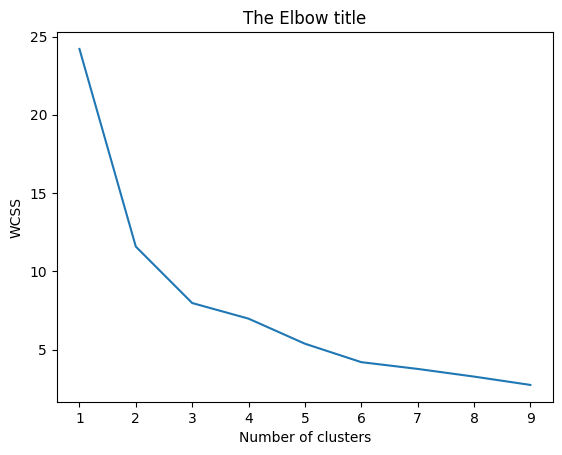

In [51]:
#run kmeans with various number of k. evaluate no. of k based on the elbow plot

wcss=[]
max_k = 10

for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(umap_embed_comments_array)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    number_clusters = range(1, max_k)

plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [66]:
#run kmeans with no. of clusters you see fit the most
k = 3
kmeans = KMeans(n_clusters = k, n_init='auto')
kmeans.fit(umap_embed_comments_array)
df['KMeans ID'] = kmeans.labels_

In [67]:
#merge all reviews of each cluster into one big sentence
df_kmeans = pd.DataFrame(columns=["KMeans ID", "texts"])

for i in range(0, k):
    row = []
    row.append(i)
    row.append(df['comment'][df['KMeans ID'] == i].to_string())
    df_kmeans.loc[len(df_kmeans)] = row

In [68]:
df_kmeans

,KMeans ID,texts
0,0,0 บ้านพี่เล็ก บ้านพี่เล็กเป็นร้านอาหารแนวค...
1,1,1 ราคาแพงมาก ไม่สมกับวัตถุดิบที่ได้มาในถ้ว...
2,2,2 ร้านนี้เป็นร้านอาหารไทยตั้งอยู่ที่บนถนนเ...


In [69]:
#create regex compiler for removal of a character you don't want
special_characters = "/[!@#$%^&*']/g"
specialchar_pattern = re.compile(special_characters)

In [70]:
#create regex compiler for removal of any emoji
emoji_pattern = re.compile("["
u"\U0001F600-\U0001F64F" # emoticons
u"\U0001F300-\U0001F5FF" # symbols & pictographs
u"\U0001F680-\U0001F6FF" # transport & map symbols
u"\U0001F1E0-\U0001F1FF" # flags (iOS)
"]+", flags=re.UNICODE)

#create regex compiler for removal of digit
number_pattern = re.compile("[0-9]")
#create regex compiler for removal of white space
space_pattern = re.compile("\s+")
#create regex compiler for removal of .
dot_pattern = re.compile(r"\.+")
#create regex compiler for removal of \
backslash_pattern = re.compile(r"\\+")

In [71]:
#define a function to tokenize a sentence into words - you can define words you want to remove as well as new words for tokenization
stopwords = list(pythainlp.corpus.thai_stopwords())
removed_words = ['',' ','    ','\n', '(', ')', '?', '+', '--', '//', 'ร้าน', '\u200b', 'ๆ(', '..', 'ๆๆๆๆ', 'ๆ', 'นะคะ', '-', '!', "['", "','", 'ครกไม้', 'ไทยลาว',"'", ',', '[', 'ลาดปลาเค้า', 'ย่าน', 'ลาด', 'ปลา', 'เค้า']
screening_words = stopwords + removed_words

# words = new_words.union(thai_words())
# custom_dictionary_trie = Trie(words)

In [72]:
#define a function to tokenize a sentence into words - you can define words you want to remove as well as new words for tokenization
def tokenize_to_list(sentence):
    merged = []
    words = pythainlp.word_tokenize(str(sentence), engine='deepcut')

    for word in words:
        if word not in screening_words:
            merged.append(word)
    return merged

In [73]:
df_kmeans['texts'] = df_kmeans['texts'].apply(lambda x: emoji_pattern.sub(r'', x))
df_kmeans['texts'] = df_kmeans['texts'].apply(lambda x: specialchar_pattern.sub(r'', x))
df_kmeans['texts'] = df_kmeans['texts'].apply(lambda x: number_pattern.sub(r'', x))
df_kmeans['texts'] = df_kmeans['texts'].apply(lambda x: space_pattern.sub(r'', x))
df_kmeans['texts'] = df_kmeans['texts'].apply(lambda x: dot_pattern.sub(r'', x))
df_kmeans['texts'] = df_kmeans['texts'].apply(lambda x: backslash_pattern.sub(r'', x))
df_kmeans['texts_tokenized'] = df_kmeans['texts'].apply(lambda x: tokenize_to_list(x))
df_kmeans['texts_count'] = df_kmeans['texts_tokenized'].apply(lambda x:collections.Counter(x).most_common())

6/6 [==============================] - 0s 21ms/step


In [74]:
df_kmeans

,KMeans ID,texts,texts_tokenized,texts_count
0,0,บ้านพี่เล็กบ้านพี่เล็กเป็นร้านอาหารแนวครอบครัร...,"[บ้าน, พี่เล็ก, บ้าน, พี่, อาหาร, แนว, ครอบครั...","[(อาหาร, 6), (บ้าน, 4), (พี่เล็ก, 3), (มื้อ, 2..."
1,1,ราคาแพงมากไม่สมกับวัตถุดิบที่ได้มาในถ้วยรสชาแว...,"[ราคา, แพง, สม, วัตถุ, ดิบ, ถ้วย, รส, ชาแวะ, ท...","[(ทาน, 3), (หยุด, 2), (สงกรานต์, 2), (จอง, 2),..."
2,2,ร้านนี้เป็นร้านอาหารไทยตั้งอยู่ที่บนถนนเฉลิมพร...,"[อาหาร, ไทย, ถนนเฉลิมพร, อาหาร, บ้าน, พี่เล็ก,...","[(อาหาร, 4), (ไทย, 2), (บ้าน, 2), (พี่เล็ก, 2)..."


In [75]:
# show top key word of each cluster

top_n_words = 10
for i in range(0, len(df_kmeans)):
    print(f"Cluster ID : {i}\n")
    print(f"Most common words include : {list(df_kmeans['texts_count'][i])[:top_n_words]}\n")

Cluster ID : 0

Most common words include : [('อาหาร', 6), ('บ้าน', 4), ('พี่เล็ก', 3), ('มื้อ', 2), ('ทาน', 2), ('แถว', 2), ('พี่', 1), ('แนว', 1), ('ครอบครัร้าน', 1), ('เหนือ', 1)]

Cluster ID : 1

Most common words include : [('ทาน', 3), ('หยุด', 2), ('สงกรานต์', 2), ('จอง', 2), ('ราคา', 1), ('แพง', 1), ('สม', 1), ('วัตถุ', 1), ('ดิบ', 1), ('ถ้วย', 1)]

Cluster ID : 2

Most common words include : [('อาหาร', 4), ('ไทย', 2), ('บ้าน', 2), ('พี่เล็ก', 2), ('ถนนเฉลิมพร', 1), ('•', 1), ('ลอง', 1), ('ดี', 1), ('กก', 1), ('”', 1)]



 ## cosine similarity clustering

In [76]:
#clustering using agglomorative clustering
knn_graph = kneighbors_graph(embed_comments_array, 5, include_self=False)
model = AgglomerativeClustering(
linkage="average", connectivity=knn_graph, n_clusters=10, metric="cosine")
model.fit(embed_comments_array)
df['Agglomerative ID'] = model.labels_

In [77]:
#merge all reviews of each cluster into one big sentence
df_Agglomerative = pd.DataFrame(columns=["Agglomerative ID", "texts"])
for i in range(0, k):
    row = []
    row.append(i)
    row.append(str(df['comment'][df['Agglomerative ID'] == i].tolist()))
    df_Agglomerative.loc[len(df_Agglomerative)] = row

In [78]:
#clean and tokenize sentences. count the occurences of each word
df_Agglomerative['texts'] = df_Agglomerative['texts'].apply(lambda x: emoji_pattern.sub(r'', x))
df_Agglomerative['texts'] = df_Agglomerative['texts'].apply(lambda x: specialchar_pattern.sub(r'', x))
df_Agglomerative['texts'] = df_Agglomerative['texts'].apply(lambda x: number_pattern.sub(r'', x))
df_Agglomerative['texts'] = df_Agglomerative['texts'].apply(lambda x: space_pattern.sub(r'', x))
df_Agglomerative['texts'] = df_Agglomerative['texts'].apply(lambda x: dot_pattern.sub(r'', x))
df_Agglomerative['texts'] = df_Agglomerative['texts'].apply(lambda x: backslash_pattern.sub(r'', x))
df_Agglomerative['texts_tokenized'] = df_Agglomerative['texts'].apply(lambda x: tokenize_to_list(x))
df_Agglomerative['texts_count'] = df_Agglomerative['texts_tokenized'].apply(lambda x:
collections.Counter(x).most_common())

29/29 [==============================] - 1s 31ms/step


In [79]:
#show top keywords of each cluster
top_N_words = 10
for i in range(0, len(df_Agglomerative)):
    print(f"Cluster ID : {i}\n")
    print(f"Most common words include :{list(df_Agglomerative['texts_count'][i])[:top_N_words]}\n")

Cluster ID : 0

Most common words include :[('หมู', 29), ('ดี', 26), ('อาหาร', 20), ('อร่อย', 20), ('ทาน', 18), ('เค็ม', 16), ('ub', 15), ('รสชาติ', 12), ('สับ', 12), ('เมนู', 11)]

Cluster ID : 1

Most common words include :[('อาหาร', 3), ('ทาน', 2), ('โต๊ะ', 2), ('หมู', 2), ('สตูลิ้น', 2), ('วัว', 2), ('อร่อย', 2), ('ขับ', 1), ('gps', 1), ('ลึก', 1)]

Cluster ID : 2

Most common words include :[('อาหาร', 8), ('รอ', 8), ('สั่ง', 6), ('ทาน', 4), ('นั่ง', 4), ('จาน', 4), ('ชม', 4), ('พนักงาน', 4), ('เสริฟ', 4), ('เมนู', 4)]

